# Predicting the quality of freshwater

#### Problem:

Freshwater is one of our most vital and scarce natural resources, making up just 3% of the earth’s total water volume. It touches nearly every aspect of our daily lives, from drinking, swimming, and bathing to generating food, electricity, and the products we use every day. Access to a safe and sanitary water supply is essential not only to human life, but also to the survival of surrounding ecosystems that are experiencing the effects of droughts, pollution, and rising temperatures.

#### Expected Solution:
To predict whether freshwater is safe to drink and use for the ecosystems that rely on it.

### Loading necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

### Loading Dataset

In [2]:
df = pd.read_csv("data/dataset.csv")

### Simple Overview of Dataset

In [3]:
df.shape

(5956842, 24)

The dataset contains nearly 6 million data points with 24 columns

In [4]:
df.head(5)

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


#### Null values

In [5]:
a = df.isna().sum().to_dict()
a

{'Index': 0,
 'pH': 116054,
 'Iron': 39753,
 'Nitrate': 105725,
 'Chloride': 175531,
 'Lead': 26909,
 'Zinc': 156126,
 'Color': 5739,
 'Turbidity': 49815,
 'Fluoride': 189156,
 'Copper': 199402,
 'Odor': 178891,
 'Sulfate': 197418,
 'Conductivity': 163861,
 'Chlorine': 57825,
 'Manganese': 109583,
 'Total Dissolved Solids': 1670,
 'Source': 88262,
 'Water Temperature': 168233,
 'Air Temperature': 29728,
 'Month': 95668,
 'Day': 99603,
 'Time of Day': 114519,
 'Target': 0}

#### Percentage of null values in each columns

In [6]:
percent_missing = {}
for key, value in a.items():
    value = (value/df.shape[0])*100
    percent_missing[key] = f"{round(value,2)}%"
percent_missing

{'Index': '0.0%',
 'pH': '1.95%',
 'Iron': '0.67%',
 'Nitrate': '1.77%',
 'Chloride': '2.95%',
 'Lead': '0.45%',
 'Zinc': '2.62%',
 'Color': '0.1%',
 'Turbidity': '0.84%',
 'Fluoride': '3.18%',
 'Copper': '3.35%',
 'Odor': '3.0%',
 'Sulfate': '3.31%',
 'Conductivity': '2.75%',
 'Chlorine': '0.97%',
 'Manganese': '1.84%',
 'Total Dissolved Solids': '0.03%',
 'Source': '1.48%',
 'Water Temperature': '2.82%',
 'Air Temperature': '0.5%',
 'Month': '1.61%',
 'Day': '1.67%',
 'Time of Day': '1.92%',
 'Target': '0.0%'}

In [7]:
df.dropna().shape

(3981800, 24)

We can not directly drop null values , since most of the data points (nearly 2 million) will be lost

#### Checking for duplicate values

In [8]:
df.duplicated().sum()

0

There is no duplicates in the dataset

In [9]:
df.dtypes

Index                       int64
pH                        float64
Iron                      float64
Nitrate                   float64
Chloride                  float64
Lead                      float64
Zinc                      float64
Color                      object
Turbidity                 float64
Fluoride                  float64
Copper                    float64
Odor                      float64
Sulfate                   float64
Conductivity              float64
Chlorine                  float64
Manganese                 float64
Total Dissolved Solids    float64
Source                     object
Water Temperature         float64
Air Temperature           float64
Month                      object
Day                       float64
Time of Day               float64
Target                      int64
dtype: object

In [10]:
numeric_features = df.select_dtypes(exclude="object").columns
categorical_features = df.select_dtypes(include="object").columns

In [11]:
print(f"No of numerical features : {len(numeric_features)}")
print(f"No of categorical features : {len(categorical_features)}")

No of numerical features : 21
No of categorical features : 3


### Data Cleaning

### Imputing missing values

In [12]:
df2 = df.drop(['Index','Target'], axis=1)

In [13]:
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

In [14]:
numeric_features = df2.select_dtypes(exclude="object").columns
categorical_features = df2.select_dtypes(include="object").columns

In [15]:
num_data = df2.drop(categorical_features,axis=1)

In [16]:
num_data.head(2)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,1.626212,87.266538,471.683357,3.708178,2.269945e-15,332.118789,NaN,43.493324,29.0,4.0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.024076e-07,284.641984,15.348981,71.220586,26.0,16.0


In [17]:
num_data = num_imputer.fit_transform(num_data)

In [18]:
num_data= pd.DataFrame(num_data, columns=numeric_features)

In [19]:
num_data.head(3)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,1.626212,87.266538,471.683357,3.708178,2.269945e-15,332.118789,16.444276,43.493324,29.0,4.0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.024076e-07,284.641984,15.348981,71.220586,26.0,16.0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,11.643467,44.891330,31.0,8.0


In [20]:
cat_data = df2.drop(numeric_features,axis=1)

In [21]:
cat_data.head(2)

,Color,Source,Month
0,Colorless,NaN,January
1,Faint Yellow,Lake,November


In [22]:
cat_data = cat_imputer.fit_transform(cat_data)

In [23]:
cat_data = pd.DataFrame(cat_data, columns=categorical_features)

In [24]:
new_df = pd.concat([num_data,cat_data,df['Target']],axis=1,sort=False)

In [25]:
new_df.head(5)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Color,Source,Month,Target
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,1.626212,...,2.269945e-15,332.118789,16.444276,43.493324,29.0,4.0,Colorless,Stream,January,0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,...,8.024076e-07,284.641984,15.348981,71.220586,26.0,16.0,Faint Yellow,Lake,November,0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,0.319956,0.423423,0.431588,3.414619,...,7.007989e-02,570.054094,11.643467,44.891330,31.0,8.0,Light Yellow,River,January,0
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,0.166319,0.208454,0.239451,1.774284,...,2.468295e-02,100.043838,10.092392,60.843233,1.0,21.0,Near Colorless,Ground,April,0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,0.795310,...,3.296139e-03,168.075545,15.249416,69.336671,29.0,7.0,Light Yellow,Spring,June,0


In [26]:
new_df.shape

(5956842, 23)

In [27]:
new_df.isna().sum()

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Water Temperature         0
Air Temperature           0
Day                       0
Time of Day               0
Color                     0
Source                    0
Month                     0
Target                    0
dtype: int64

## EDA

In [28]:
new_df.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06
mean,7.445455e+00,1.270642e-01,6.159926e+00,1.840530e+02,1.491568e-03,1.537977e+00,5.189024e-01,9.584219e-01,5.104924e-01,1.802583e+00,1.456977e+02,4.242295e+02,3.255291e+00,1.072818e-01,2.671450e+02,1.905397e+01,6.000321e+01,1.573674e+01,1.151357e+01,3.030552e-01
std,8.794723e-01,4.784966e-01,3.228502e+00,6.742709e+01,3.243306e-02,1.527802e+00,9.224381e-01,8.122642e-01,5.872632e-01,1.053414e+00,6.767972e+01,1.874179e+02,7.292924e-01,4.720082e-01,1.558367e+02,1.121341e+01,1.805455e+01,8.720624e+00,6.856328e+00,4.595789e-01
min,1.057113e+00,2.047587e-53,2.861727e-01,2.363919e+01,0.000000e+00,1.482707e-08,1.029712e-16,4.550148e-06,2.982735e-10,1.100007e-02,1.194073e+01,1.059998e+01,9.019921e-01,4.793505e-55,1.048902e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.906025e+00,1.052744e-05,4.002814e+00,1.393510e+02,3.766829e-122,4.291246e-01,3.950675e-02,3.867456e-01,1.349125e-01,9.194811e-01,9.903477e+01,2.896555e+02,2.749516e+00,2.922621e-06,1.329527e+02,1.149159e+01,4.786198e+01,8.000000e+00,6.000000e+00,0.000000e+00
50%,7.449564e+00,2.249640e-03,5.604051e+00,1.760178e+02,2.213625e-62,1.081818e+00,2.097680e-01,7.751792e-01,3.479592e-01,1.774284e+00,1.346489e+02,3.970808e+02,3.209748e+00,6.481943e-04,2.658880e+02,1.644428e+01,5.999681e+01,1.600000e+01,1.200000e+01,0.000000e+00
75%,8.002201e+00,5.357421e-02,7.625683e+00,2.165092e+02,2.644969e-27,2.187155e+00,6.197276e-01,1.318141e+00,6.851771e-01,2.627163e+00,1.797332e+02,5.284464e+02,3.699635e+00,1.590435e-02,3.984555e+02,2.354112e+01,7.214153e+01,2.300000e+01,1.700000e+01,1.000000e+00
max,1.291072e+01,1.935315e+01,9.639078e+01,1.507310e+03,5.844281e+00,2.836867e+01,2.371527e+01,1.464625e+01,1.207482e+01,4.141998e+00,1.434587e+03,2.271632e+03,1.256663e+01,2.374086e+01,5.797999e+02,2.973086e+02,1.521237e+02,3.100000e+01,2.300000e+01,1.000000e+00


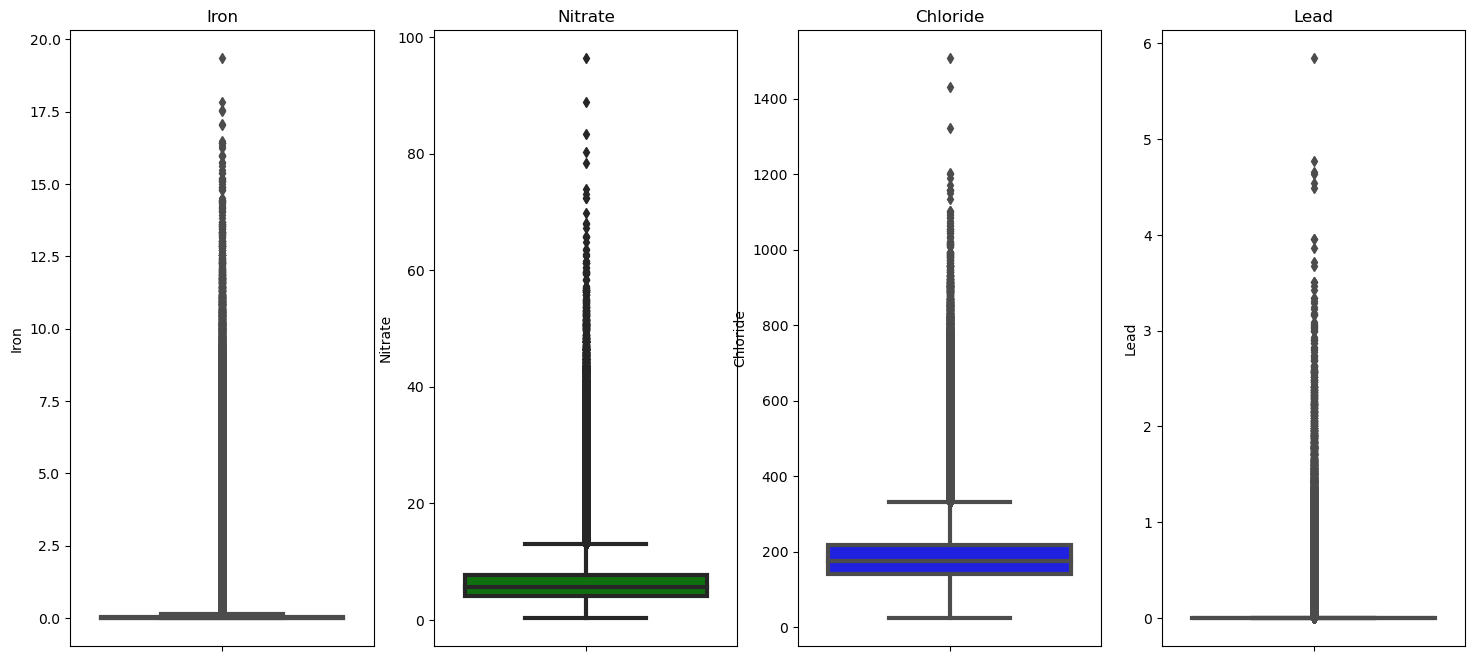

In [29]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Iron')
sns.boxplot(y='Iron',data=new_df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Nitrate')
sns.boxplot(y='Nitrate',data=new_df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Chloride')
sns.boxplot(y='Chloride',data=new_df,color='blue',linewidth=3)
plt.subplot(1, 4, 4)
plt.title('Lead')
sns.boxplot(y='Lead',data=new_df,color='yellow',linewidth=3)
plt.show()

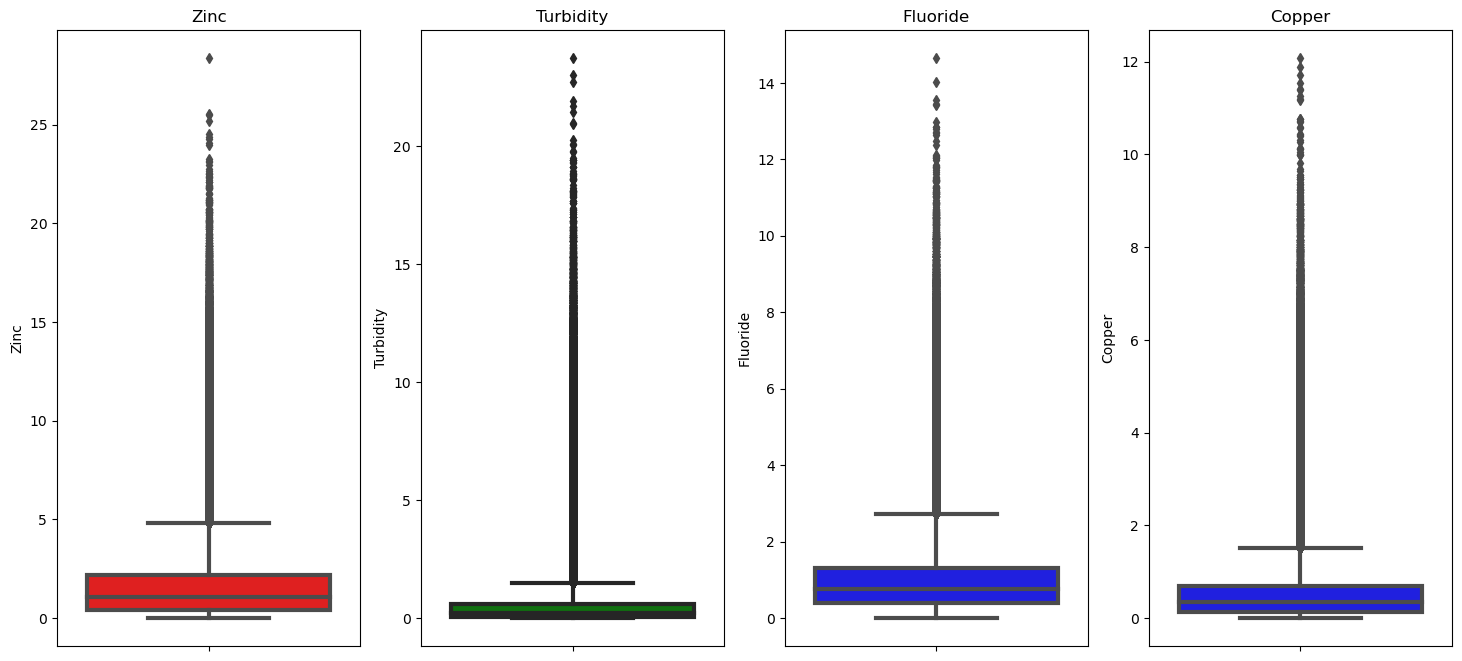

In [30]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Zinc')
sns.boxplot(y='Zinc',data=new_df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Turbidity')
sns.boxplot(y='Turbidity',data=new_df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Fluoride')
sns.boxplot(y='Fluoride',data=new_df,color='blue',linewidth=3)
plt.subplot(1, 4, 4)
plt.title('Copper')
sns.boxplot(y='Copper',data=new_df,color='blue',linewidth=3)
plt.show()

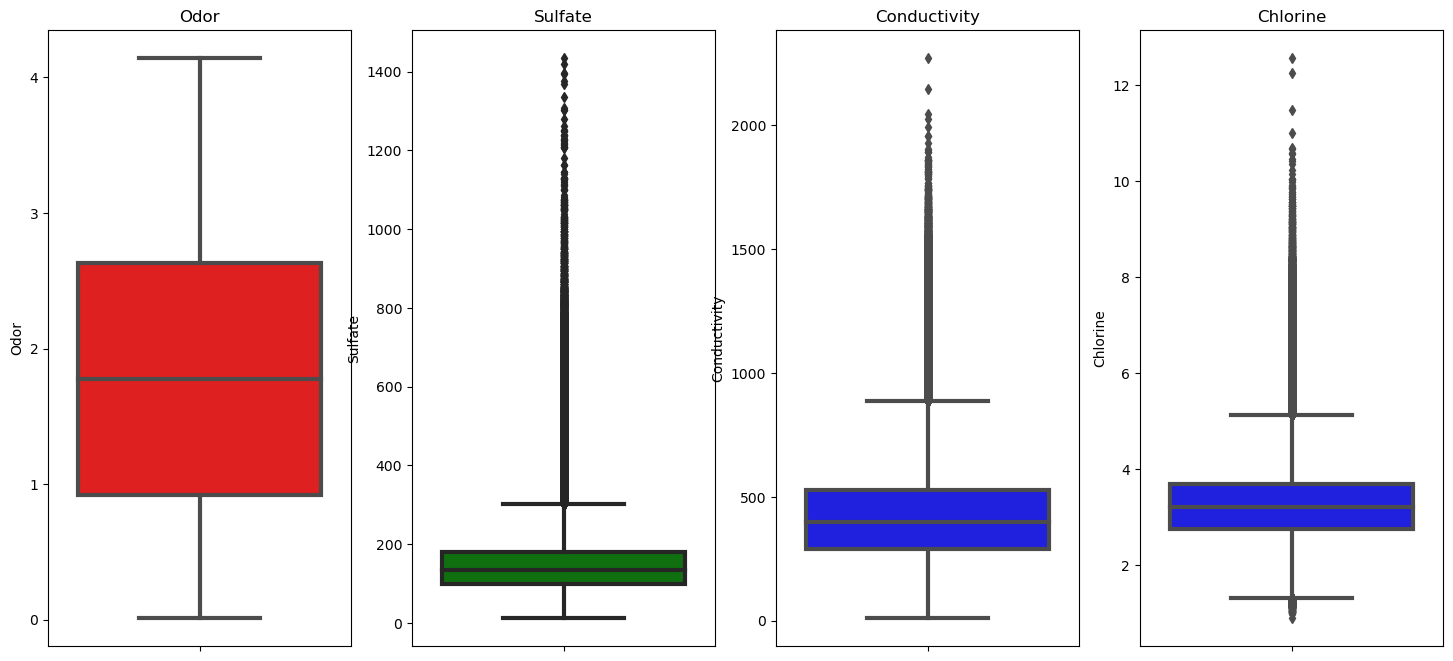

In [31]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Odor')
sns.boxplot(y='Odor',data=new_df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Sulfate')
sns.boxplot(y='Sulfate',data=new_df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Conductivity')
sns.boxplot(y='Conductivity',data=new_df,color='blue',linewidth=3)
plt.subplot(1, 4, 4)
plt.title('Chlorine')
sns.boxplot(y='Chlorine',data=new_df,color='blue',linewidth=3)
plt.show()

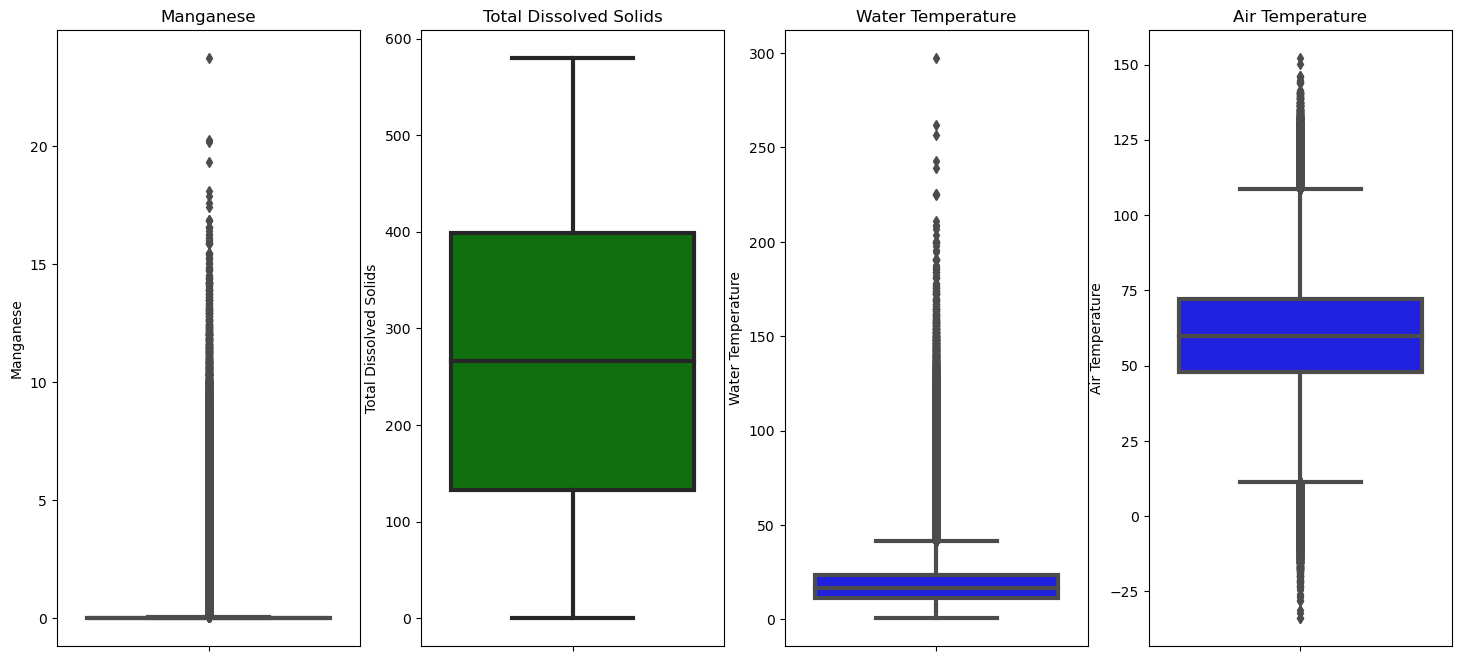

In [32]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Manganese')
sns.boxplot(y='Manganese',data=new_df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Total Dissolved Solids')
sns.boxplot(y='Total Dissolved Solids',data=new_df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Water Temperature')
sns.boxplot(y='Water Temperature',data=new_df,color='blue',linewidth=3)
plt.subplot(1, 4, 4)
plt.title('Air Temperature')
sns.boxplot(y='Air Temperature',data=new_df,color='blue',linewidth=3)
plt.show()

- From the above box plot it is clearly understood that most of columns which are chemical parameter have outliers which has to be eliminated
- odor and total dissolved solids has no outliers which can be omitted during outlier removal

In [33]:
chemical_parameters = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity',
       'Fluoride', 'Copper',  'Sulfate', 'Conductivity', 'Chlorine',
       'Manganese']

In [34]:
data = {}
for i in chemical_parameters:
    parameters = []
    parameters.append(new_df[i].min())
    parameters.append(new_df[i].quantile(0.25))
    parameters.append(new_df[i].quantile(0.75))
    Q1 = new_df[i].quantile(0.25)
    Q3 = new_df[i].quantile(0.75)
    IQR = Q3 - Q1
    max_limit = Q3 + 1.5 * IQR
    parameters.append(max_limit)
    parameters.append(new_df[i].max())
    data[i] = parameters

In [35]:
che_parameters = pd.DataFrame(data, index = ['min', '25%' , '75%', 'max_after_removal','max_before_removal'])

In [36]:
che_parameters

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Sulfate,Conductivity,Chlorine,Manganese
min,1.057113,2.047587e-53,0.286173,23.639187,0.000000e+00,1.482707e-08,1.029712e-16,0.000005,2.982735e-10,11.940727,10.599984,0.901992,4.793505e-55
25%,6.906025,1.052744e-05,4.002814,139.350959,3.766829e-122,4.291246e-01,3.950675e-02,0.386746,1.349125e-01,99.034767,289.655503,2.749516,2.922621e-06
75%,8.002201,5.357421e-02,7.625683,216.509174,2.644969e-27,2.187155e+00,6.197276e-01,1.318141,6.851771e-01,179.733198,528.446379,3.699635,1.590435e-02
max_after_removal,9.646465,1.339197e-01,13.059986,332.246496,6.612423e-27,4.824201e+00,1.490059e+00,2.715234,1.510574e+00,300.780843,886.632692,5.124814,3.975649e-02
max_before_removal,12.910719,1.935315e+01,96.390779,1507.309881,5.844281e+00,2.836867e+01,2.371527e+01,14.646254,1.207482e+01,1434.586543,2271.631722,12.566630,2.374086e+01


In [37]:
temp_df = new_df.copy()

In [38]:
col = che_parameters.columns
for i in col:
    temp_df = temp_df[temp_df[i] < che_parameters[i][3]]

In [39]:
temp_df.shape

(2626537, 23)

In [40]:
temp_df.head(5)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Color,Source,Month,Target
0,8.332988,8.347252e-05,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,1.626212,...,2.269945e-15,332.118789,16.444276,43.493324,29.0,4.0,Colorless,Stream,January,0
1,6.917863,8.053827e-05,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,...,8.024076e-07,284.641984,15.348981,71.220586,26.0,16.0,Faint Yellow,Lake,November,0
4,8.091909,2.167128e-03,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,0.795310,...,3.296139e-03,168.075545,15.249416,69.336671,29.0,7.0,Light Yellow,Spring,June,0
6,8.132455,5.526229e-02,4.288010,94.993978,2.919909e-52,1.770221,0.021703,1.111893,0.247116,0.426404,...,3.083768e-02,266.079565,27.920380,68.104498,14.0,13.0,Light Yellow,Aquifer,September,0
7,7.258203,6.107130e-09,9.261676,182.242341,4.399852e-224,0.416478,0.047803,1.016196,0.298093,3.144199,...,6.020680e-16,214.553104,15.891905,61.139140,11.0,4.0,Colorless,River,April,0


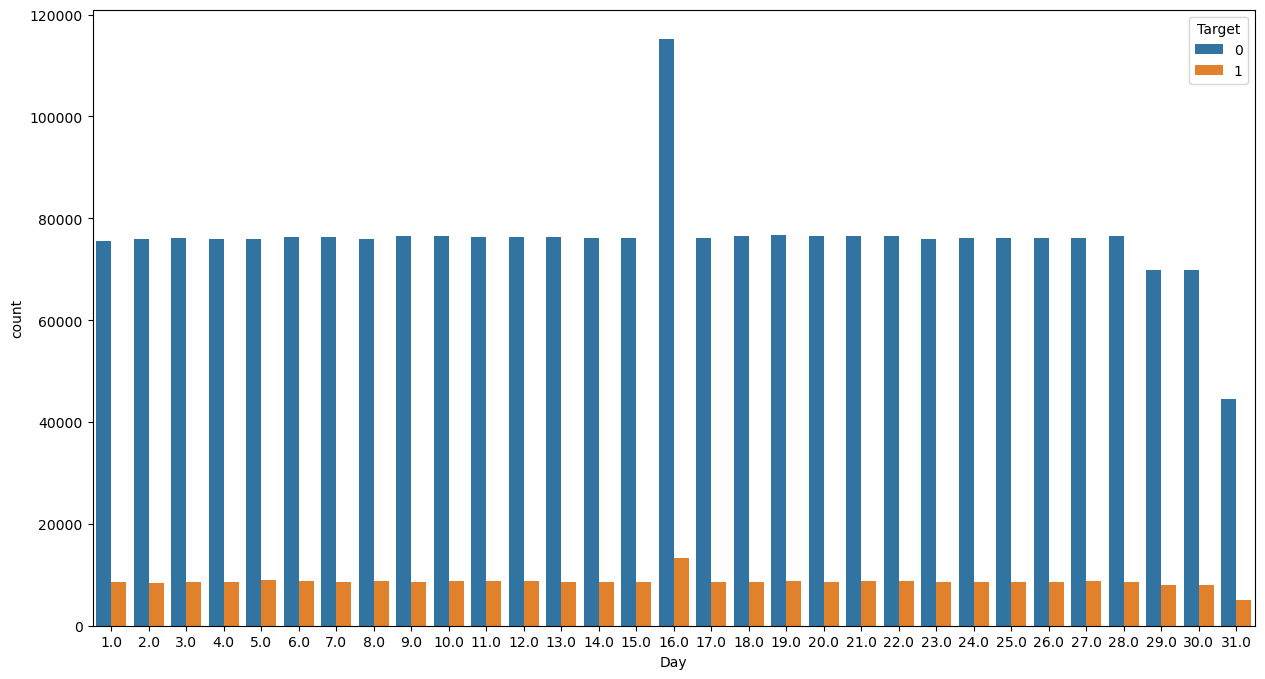

In [41]:
plt.figure(figsize=(15, 8))
sns.countplot(data=temp_df, x='Day', hue='Target')
plt.show()

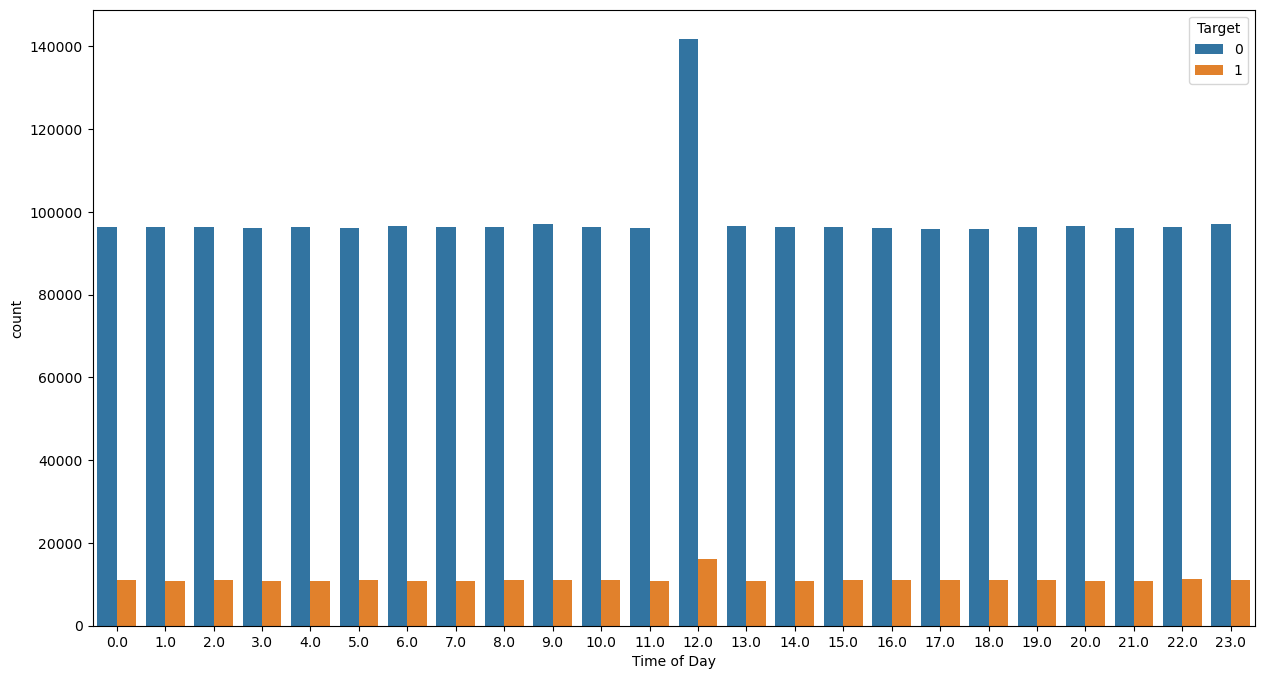

In [42]:
plt.figure(figsize=(15, 8))
sns.countplot(data=temp_df, x='Time of Day', hue='Target')
plt.show()

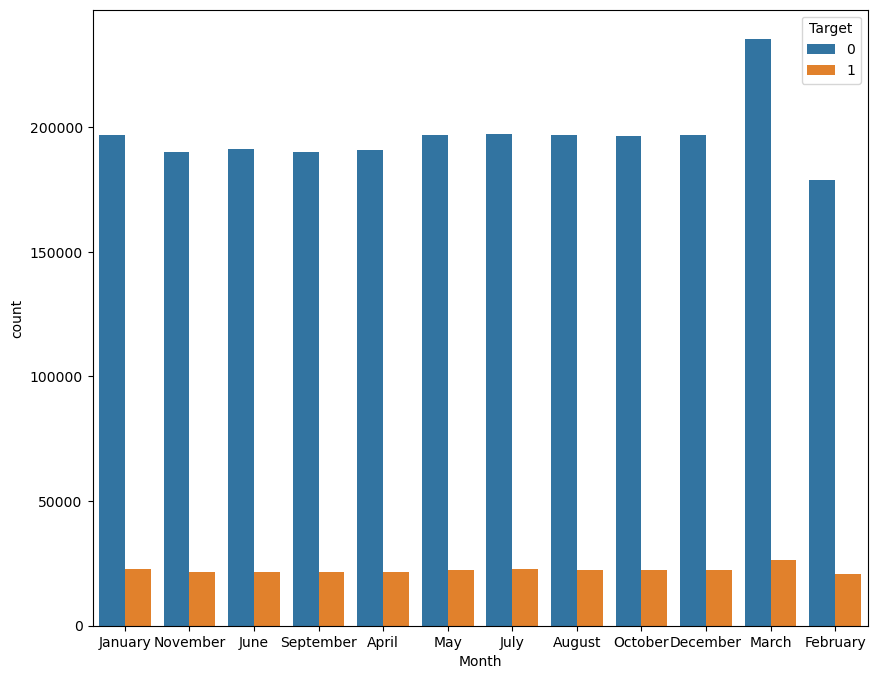

In [43]:
plt.figure(figsize=(10, 8))
sns.countplot(data=temp_df, x='Month', hue='Target')
plt.show()

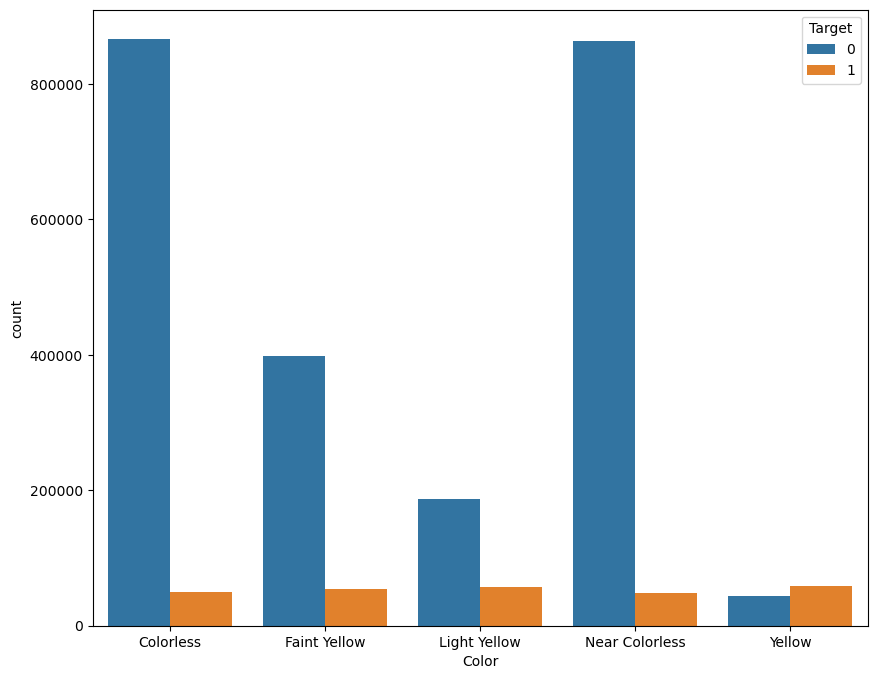

In [44]:
plt.figure(figsize=(10, 8))
sns.countplot(data=temp_df, x='Color', hue='Target')
plt.show()

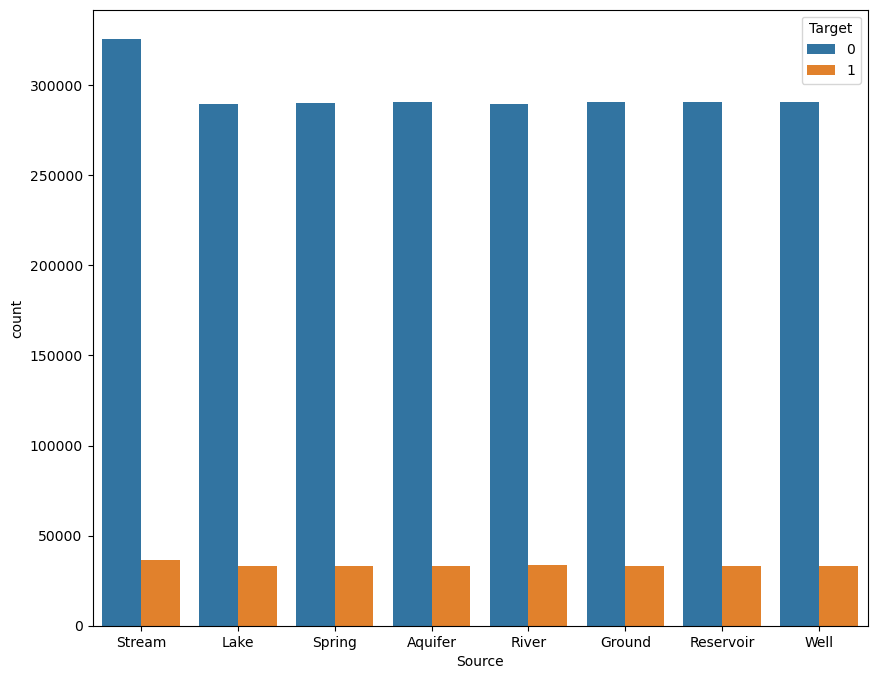

In [45]:
plt.figure(figsize=(10, 8))
sns.countplot(data=temp_df, x='Source', hue='Target')
plt.show()

#### From the above graphs some of the columns doesn't have any effect on the target variable. But since the data is imbalanced we can recheck once again

### Data balancing

Checking whether classes are balanced

In [46]:
temp_df['Target'].value_counts()

0    2358188
1     268349
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='Count'>

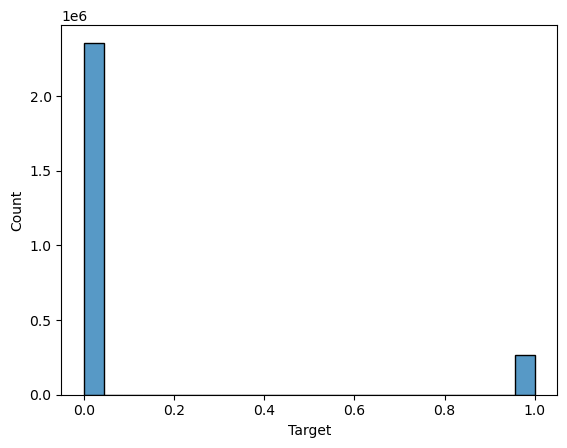

In [47]:
sns.histplot(data=temp_df, x='Target')

- From the above analysis, the classes are very much imbalanced nearly 8.5:1 ratio
- We have to balance the class before proceeding further

In [48]:
target_zero_indices = temp_df[temp_df['Target'] == 0].index   
target_zero = len(temp_df[temp_df['Target'] == 0])            
print(target_zero)

2358188


In [49]:
target_one = len(temp_df[temp_df['Target'] == 1])            
print(target_one)

268349


In [50]:
target_zero_indices

Int64Index([      0,       1,       4,       6,       7,       8,       9,
                 10,      11,      12,
            ...
            5951103, 5951104, 5951105, 5951107, 5951108, 5951110, 5951111,
            5951116, 5951118, 5951120],
           dtype='int64', length=2358188)

In [51]:
target_one_indices = temp_df[temp_df['Target'] == 1].index

In [52]:
random_indices = np.random.choice( target_zero_indices, target_one  , replace=False)

In [53]:
num_data = temp_df.loc[random_indices]
num_data.to_csv('data/num_data.csv', index=False)

In [54]:
cat_data = temp_df.loc[target_one_indices]
cat_data.to_csv('data/cat_data.csv', index=False)

In [55]:
down_sample_indices = np.concatenate([target_one_indices,random_indices]) 

In [56]:
new_df_sample = temp_df.loc[down_sample_indices] 

In [57]:
new_df_sample.shape

(536698, 23)

In [58]:
new_df_sample.head(2)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Color,Source,Month,Target
266757,6.703964,0.000137,10.552672,211.930128,1.888592e-48,2.848238,0.081378,1.610560,0.460880,1.278813,...,7.472054e-12,330.241630,15.644198,84.323390,28.0,16.0,Colorless,Reservoir,April,1
266758,5.396613,0.000005,5.703348,225.017979,1.917085e-28,0.400466,0.154662,0.070338,0.162591,1.038821,...,2.900787e-07,80.026017,18.005467,55.267615,21.0,9.0,Colorless,Spring,March,1


In [59]:
new_df_sample['Target'].value_counts()

1    268349
0    268349
Name: Target, dtype: int64

Now the data is balanced

### EDA on balanced data

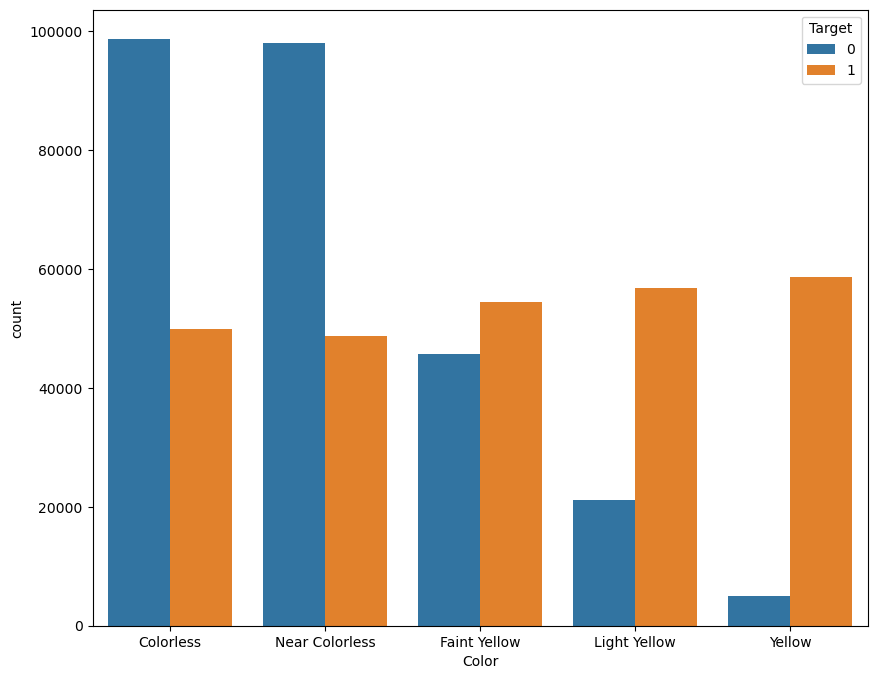

In [60]:
plt.figure(figsize=(10, 8))
sns.countplot(data=new_df_sample, x='Color', hue='Target')
plt.show()

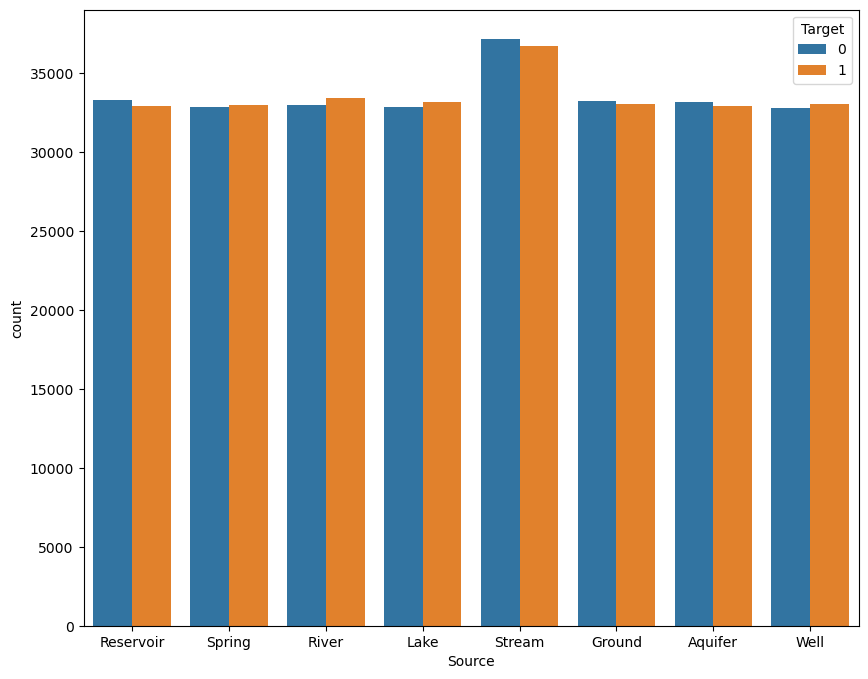

In [61]:
plt.figure(figsize=(10, 8))
sns.countplot(data=new_df_sample, x='Source', hue='Target')
plt.show()

In [62]:
grouped = new_df_sample.groupby('Color')['Target'].value_counts()
grouped

Color           Target
Colorless       0         98613
                1         49908
Faint Yellow    1         54346
                0         45669
Light Yellow    1         56760
                0         21097
Near Colorless  0         97979
                1         48707
Yellow          1         58628
                0          4991
Name: Target, dtype: int64

<Axes: xlabel='Air Temperature', ylabel='Count'>

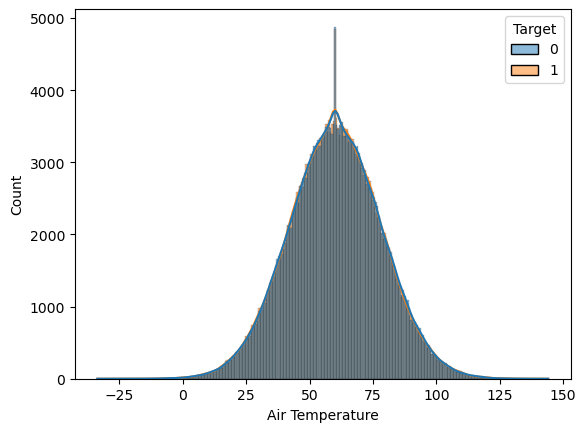

In [63]:
sns.histplot(data=new_df_sample, x='Air Temperature', hue= 'Target',kde =True )

<Axes: xlabel='Water Temperature', ylabel='Count'>

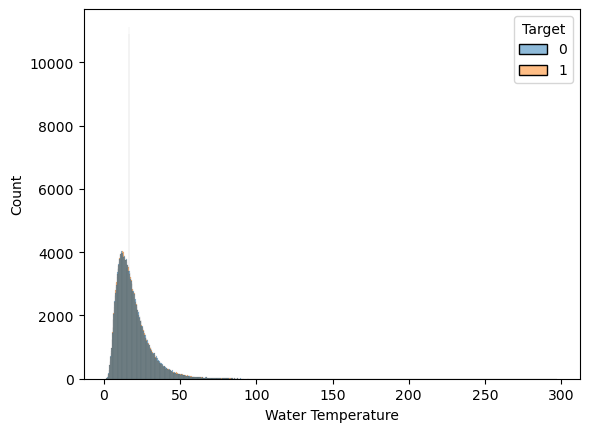

In [64]:
sns.histplot(data=new_df_sample, x='Water Temperature', hue= 'Target')

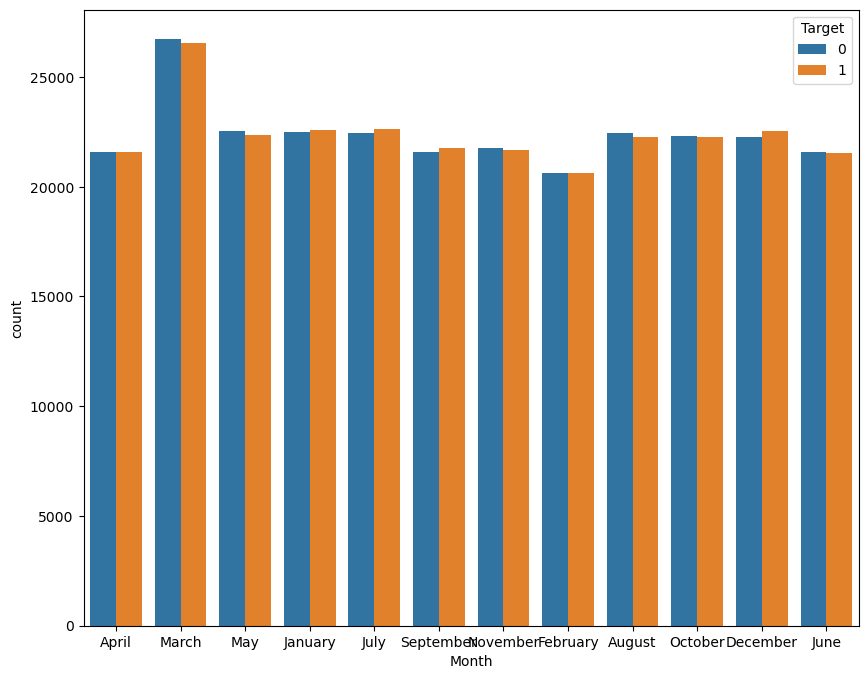

In [65]:
plt.figure(figsize=(10, 8))
sns.countplot(data=new_df_sample, x='Month', hue='Target')
plt.show()

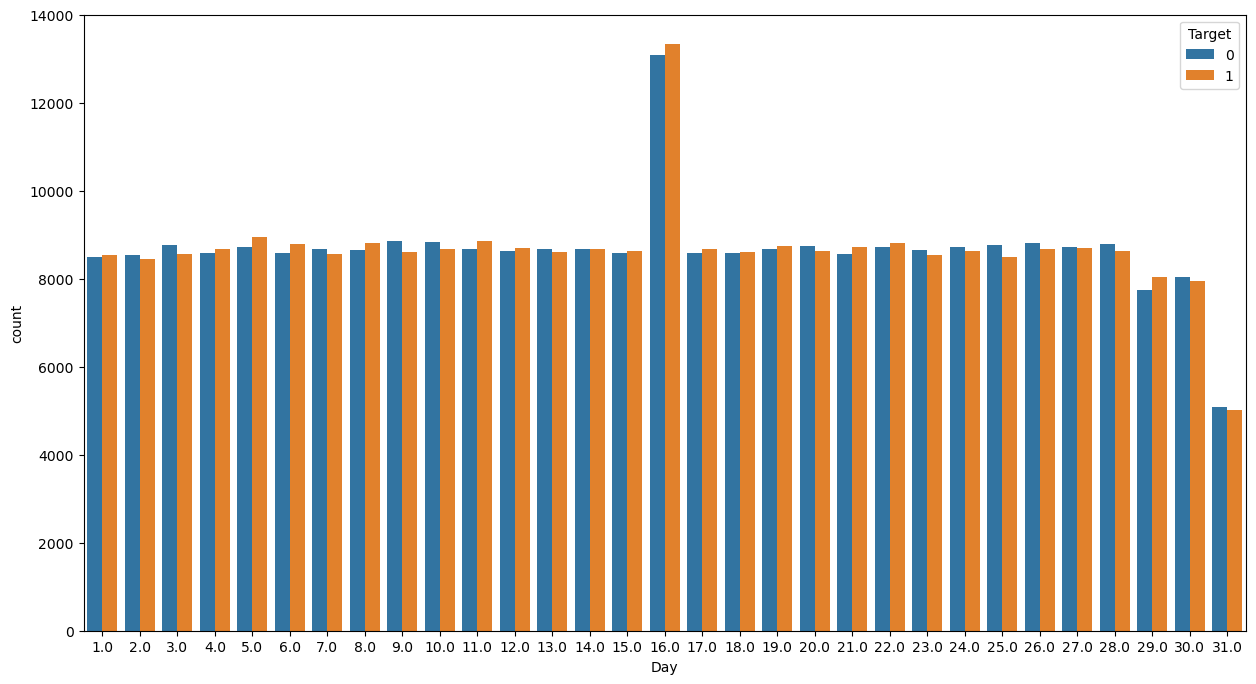

In [66]:
plt.figure(figsize=(15, 8))
sns.countplot(data=new_df_sample, x='Day', hue='Target')
plt.show()

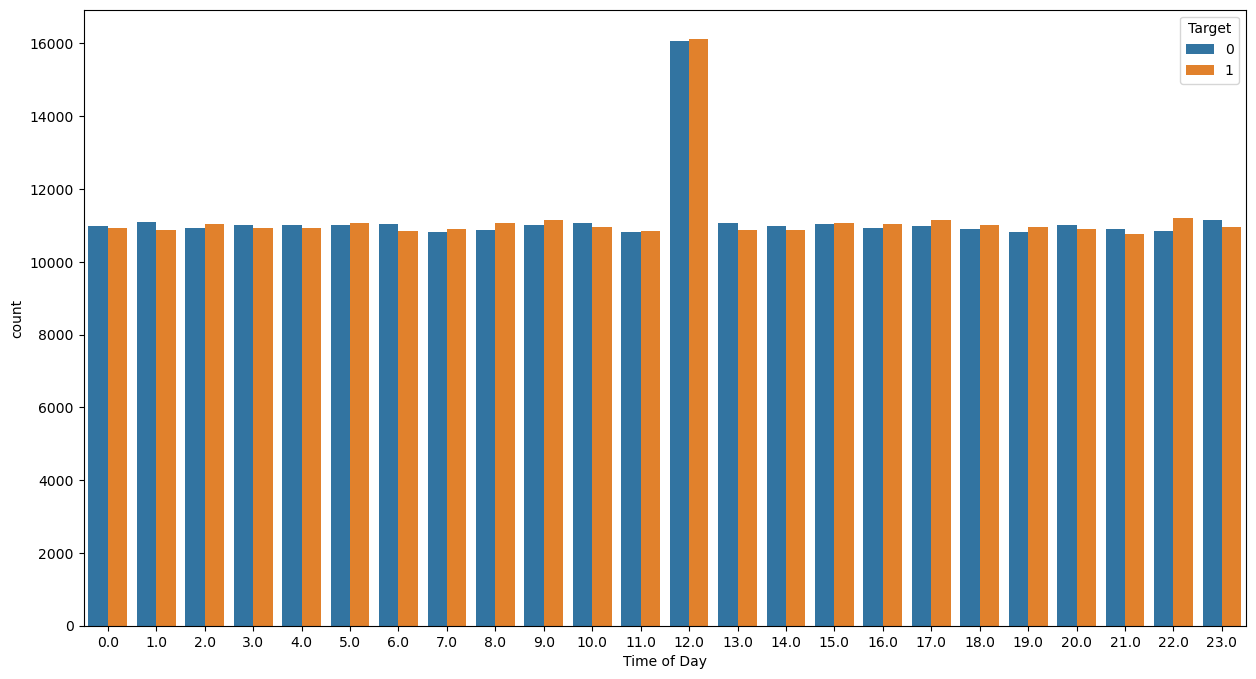

In [67]:
plt.figure(figsize=(15, 8))
sns.countplot(data=new_df_sample, x='Time of Day', hue='Target')
plt.show()

The above three columns have very minute effect on the target class which can be dropped during model bulding

<Axes: xlabel='pH', ylabel='Count'>

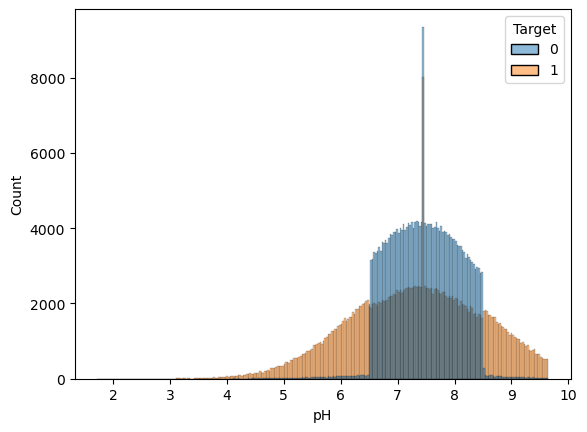

In [68]:
sns.histplot(data=new_df_sample, x='pH', hue= 'Target')

ph between 6.5 to 8.5 have very high class 0 variable, which shows that the classes depend on pH

<Axes: xlabel='Copper', ylabel='Count'>

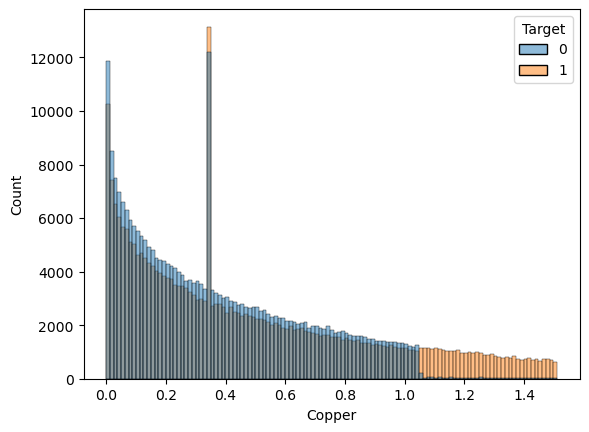

In [69]:
sns.histplot(data=new_df_sample, x='Copper', hue= 'Target')

<Axes: xlabel='Turbidity', ylabel='Count'>

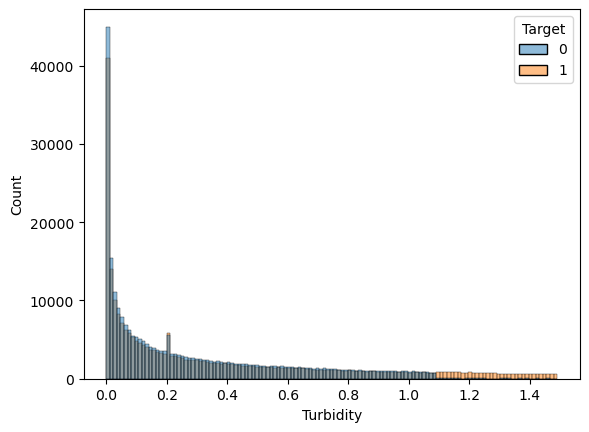

In [70]:
sns.histplot(data=new_df_sample, x='Turbidity', hue= 'Target')

<Axes: xlabel='Conductivity', ylabel='Count'>

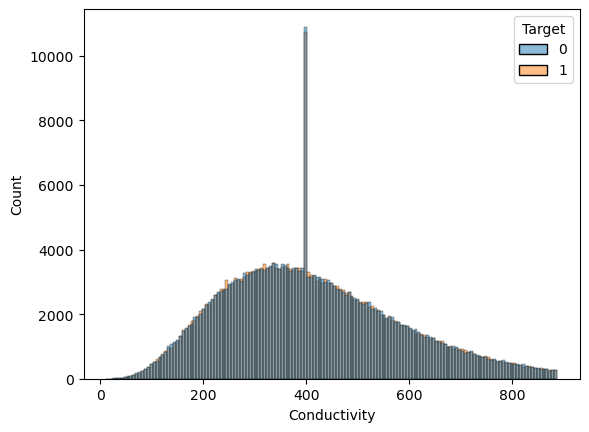

In [71]:
sns.histplot(data=new_df_sample, x='Conductivity', hue= 'Target')

<Axes: xlabel='Conductivity', ylabel='pH'>

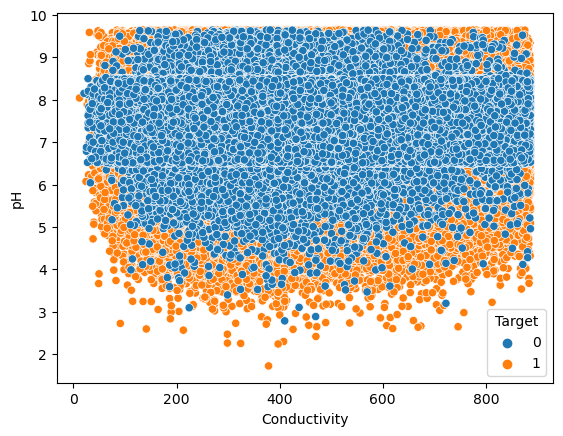

In [72]:
sns.scatterplot(data= new_df_sample, x='Conductivity', y='pH', hue='Target')

<Axes: xlabel='Conductivity', ylabel='Total Dissolved Solids'>

C:\Users\arunv\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\arunv\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


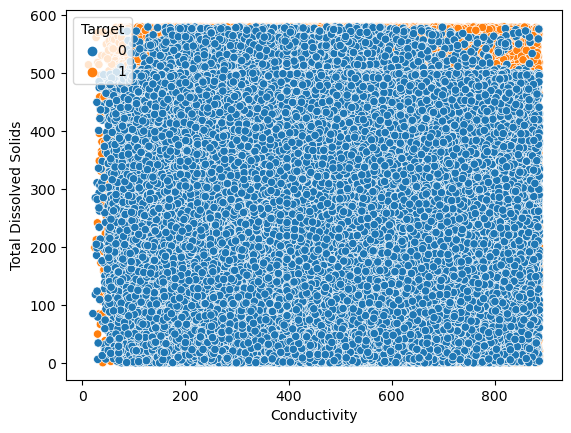

In [73]:
sns.scatterplot(data= new_df_sample, x='Conductivity', y='Total Dissolved Solids', hue='Target')

In [74]:
sns.pairplot(data=new_df_sample, vars = ['pH', 'Conductivity', 'Total Dissolved Solids'] , hue = 'Target')

Error in callback <function flush_figures at 0x000002490B987B50> (for post_execute):


KeyboardInterrupt: 

From the above plots, there is no multicollinearity in the dataframe

In [74]:
final_df = new_df_sample.drop(['Month', 'Day','Time of Day','Water Temperature','Air Temperature'], axis = 1)

In [75]:
final_df.head(2)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Color,Source,Target
266757,6.703964,0.000137,10.552672,211.930128,1.888592e-48,2.848238,0.081378,1.610560,0.460880,1.278813,89.290890,570.051816,3.265975,7.472054e-12,330.241630,Colorless,Reservoir,1
266758,5.396613,0.000005,5.703348,225.017979,1.917085e-28,0.400466,0.154662,0.070338,0.162591,1.038821,247.846145,435.979961,3.287618,2.900787e-07,80.026017,Colorless,Spring,1


### Exporting Dataframe to build model

In [76]:
final_df.to_csv('data/waterquality.csv', index=False)